### Processamento Digital de Imagens - Filtros, equalização e limiarização

* Em PDI, podemos utilizar filtros para destacar ou suavizar partes da imagem.
* Estes filtros, assim como as demais operações vistas até então, são operações matemáticas realizadas na matriz da imagem
* Na imagem, podemos ter diversos tipos de informações dependendo da região, sendo assim, os filtros comumente são aplicados localmente na imagem por meio de um conceito conhecido como **janela deslizante**.
  * Dada uma região de pixels da imagem (uma submatriz da imagem representada pelo quadrado verde)
  * O filtro é aplicado nesta região 
  * Em seguida, a submatriz é deslocada/transladada para a região seguinte da imagem, fazendo a aplicação do filtro naquela mesma região
  * Esse processo é repetido até o final da imagem

![Title](imgs/sliding_window_example.gif)

#### Vamos entender matematicamente?

***Convolução***

No processamento de imagens, o kernel de convolução é uma matriz 2D que é utilizada para a aplicação de filtros em imagens. Esses kernels também são conhecidos como matriz de convolução, usualmente essa matrizes são quadradas, *MxN*, onde tanto o *M como o N* são números ímpares (3x3, 5x5, 7x7, etc). Um exemplo de matriz 3x3 é como a demonstrada abaixo:

$M = \begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}$

Esses kernels podem ser utilizados para alcançar um efeito desejado:
- Blurring
- Sharpening

- Reduz algum tipo de ruído na imagem. Por este motivo, *blurring* também é conhecido como suavização (*smoothing*).
- Para aumentar o foco da imagem para uma porção específica e reduzir a informação do *background,* como feito em algumas cameras de smartphones no modo “retrato”.

Aplicando o seguinte filtro:

 $M = \begin{bmatrix}
1 & 0 & -1\\
1 & 0 & -1 \\
1 & 0 & -1
\end{bmatrix}$


![Title](imgs/conv.png)

Aplicando o seguinte filtro:

 $M = \begin{bmatrix}
1 & 0 & 1\\
0 & 1 & 0 \\
1 & 0 & 1
\end{bmatrix}$

![https://miro.medium.com/max/658/0*jLoqqFsO-52KHTn9.gif](https://miro.medium.com/max/658/0*jLoqqFsO-52KHTn9.gif)

Perceba que o tamanho da imagem convoluída é menor que a original.

Portanto, em geral, utilizamos uma técnica conhecida como *zero-padding*, adicionando uma camada de zeros ao redor da imagem, e dessa forma preservando o tamanho da imagem original, antes da convolução.

![https://deeplizard.com/assets/jpg/2b25a0c1.jpg](https://deeplizard.com/assets/jpg/2b25a0c1.jpg)

#### Vamos entender como funciona no python 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import requests
lago_url = "https://images.unsplash.com/photo-1516132006923-6cf348e5dee2?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1374&q=80"

# Fazendo o download da imagem lago_url
img_data = requests.get(url=lago_url).content
# Salvando a imagem no diretório local, com o nome `lago.png`
with open("lago.png", 'wb') as handler:
    handler.write(img_data)

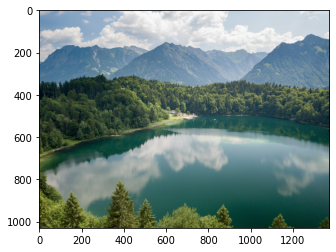

In [3]:
lago = cv2.imread('lago.png')
plt.imshow(cv2.cvtColor(lago, cv2.COLOR_BGR2RGB))

In [4]:
lago_r, lago_g, lago_b = cv2.split(lago)

In [5]:
lago_b

array([[180, 180, 181, ..., 206, 208, 208],
       [179, 180, 181, ..., 207, 208, 208],
       [179, 180, 181, ..., 210, 209, 209],
       ...,
       [ 55,  47,  44, ...,  80,  71,  63],
       [ 57,  51,  50, ...,  68,  69,  68],
       [ 55,  52,  54, ...,  51,  54,  57]], dtype=uint8)

In [6]:
subset = lago_b[0:3, 0:3]
subset

array([[180, 180, 181],
       [179, 180, 181],
       [179, 180, 181]], dtype=uint8)

In [7]:
kernel = np.asarray([
    [0, 0, 0,],
    [0, 1, 0],
    [0, 0, 0]
])
print(kernel)

[[0 0 0]
 [0 1 0]
 [0 0 0]]


In [8]:
multiplica = np.multiply(subset, kernel)
np.sum(multiplica)

180

### Utilização no OpenCV

#### Filtros de suavização

O blur aplica uma suavização do pixel central em relação a sua vizinhança.

Um dos métodos de suavização é o filtro médio, que pode ser representado como:

$M = \frac{1}{9}\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}$

In [9]:
img = cv2.imread('../imgs/cat.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [10]:
img.shape

(1415, 2120, 3)

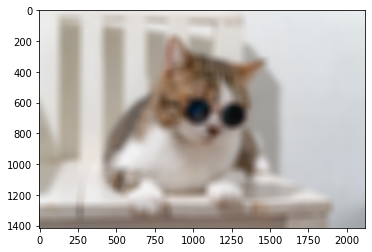

In [11]:
img_blur = cv2.blur(img, (55,55))
plt.imshow(img_blur)

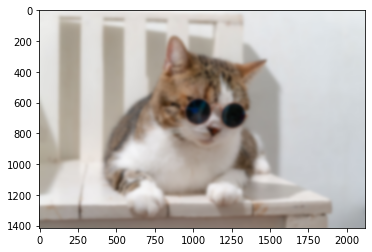

In [12]:
blur = cv2.GaussianBlur(img, (55,55),0)
plt.imshow(blur)

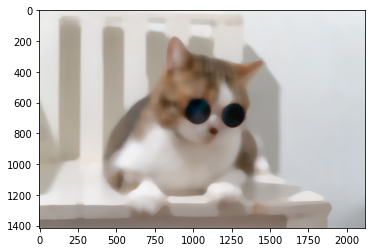

In [13]:
median = cv2.medianBlur(img,55)
plt.imshow(median)

**Detecção de bordas**

- Uma das técnicas mais importantes no processamento de imagem;
- Uma das features mais importantes associadas a uma imagem;

Bordas são caracterizadas por uma mudança repentina na intensidade do pixel.

Verificamos a mudança de um pixel alvo em relação a sua vizinhança, se houver uma mudança repentina na intensidade do pixel, pode ser considerada uma possível borda.


A deteção de bordas é uma técnica de processamento de imagem, que é utilizada para identificar as bordas de objetos, ou regiões dentro de uma imagem. Bordas são uma das features mais importantes associadas a uma imagem. Nós podemos identificar a estrutura de uma imagem através das bordas. Sendo que em pipelines de visão computacional a deteção de bordas é amplamente aplicada.


Uma mudança repentina de intensidade está representada abaixo:

![https://learnopencv.com/wp-content/uploads/2021/06/pixel_intensity.png](https://learnopencv.com/wp-content/uploads/2021/06/pixel_intensity.png)

Esse aumento repentino fica mais evidente ao plotarmos a derivada de primeira ordem da função de intensidade

![https://learnopencv.com/wp-content/uploads/2021/06/first_derivative.png](https://learnopencv.com/wp-content/uploads/2021/06/first_derivative.png)


Para a detecção de bordas de Sobel, temos os seguintes kernels:

$SobelX = \begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}$, para a direção X

$SobelY = \begin{bmatrix}
1 & 2 & 1\\
0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}$, para a direção Y

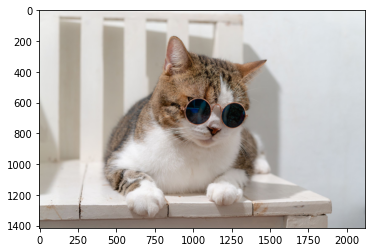

In [14]:
plt.imshow(img, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


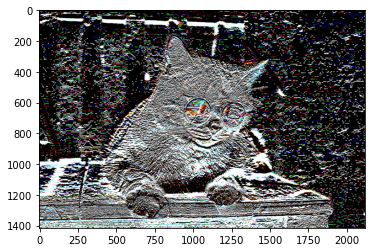

In [15]:
### sobel X
sobel_x = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
plt.imshow(sobel_x, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


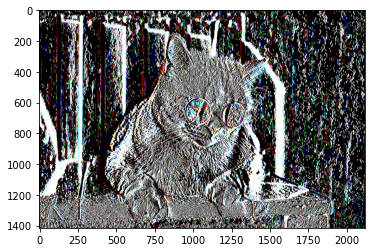

In [16]:
### sobel y
sobel_y = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobel_y, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


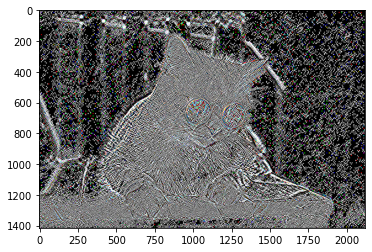

In [17]:
### sobel xy
sobel_y = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=7)
plt.imshow(sobel_y, cmap='gray')

### Canny
 
* Filtro de detecção de bordas baseado no gradiente
* Possui dois thresholds (mínimo e máximo) que auxiliam a identificar o que realmente é borda ou ruído na imagem

leitura sobre o canny https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

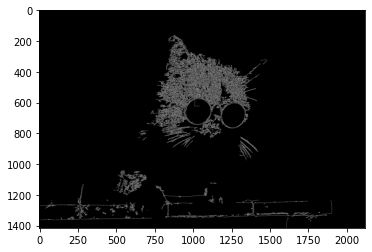

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 50, 250)
plt.imshow(edged, cmap='gray');

#### Criando seu próprio filtro no OpenCV

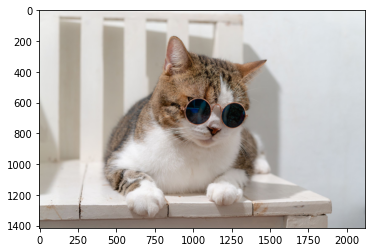

In [19]:
plt.imshow(img)

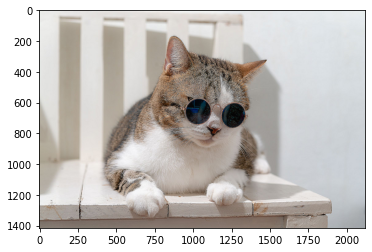

In [20]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen_img = cv2.filter2D(img, -1, kernel)
plt.imshow(sharpen_img)

**Limiarização global**

A limiriarização global, nessa técnica aplicamos um limiar (threshold) para cada pixel. Caso o valor seja menor do que o limiar tornamos o valor 0, caso contrário utilizaremos o valor máximo (255, por exemplo).

Por exemplo, no histograma abaixo, todos os pixels abaixo do limiar (T) serão ajustados para 0, enquanto valores acima do limiar T serão atribuídos com um valor pré-determinado (255, p.ex.). Uma das vantagens é a redução de ruído na imagem, ou para evidenciar alguma característica na imagem. 

![Fig](https://s3-sa-east-1.amazonaws.com/lcpi/c47082ad-acd2-4f33-9167-c478667caf1b.png)

Leitura extra: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

#### Cada binarização tem seu efeito na imagem
![Fig](https://s3-sa-east-1.amazonaws.com/lcpi/fcf2aa7b-650b-420b-9fce-e0703850d0ba.png)

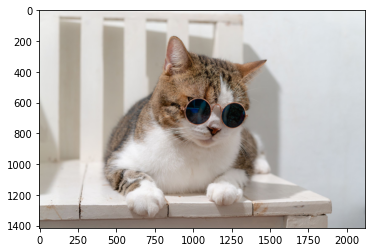

In [21]:
plt.imshow(img)

Text(0, 0.5, 'Numero de pixel')

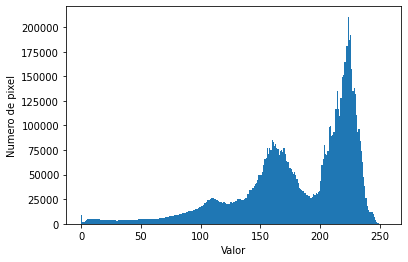

In [22]:
plt.hist(img.ravel(), 256)
plt.xlabel('Valor')
plt.ylabel('Numero de pixel')

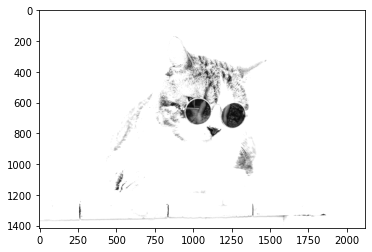

In [23]:
ret, th1 = cv2.threshold(gray,
                         100, #limiar minimo
                         255, #limiar maximo
                         cv2.THRESH_TRUNC
        )
plt.imshow(th1, cmap='gray')

### Threshold adaptativo

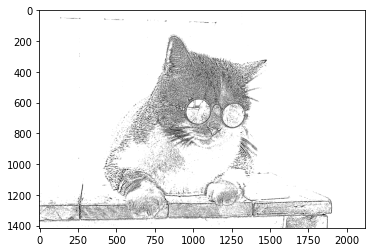

In [24]:
th1 = cv2.adaptiveThreshold(
            gray,
            255,
            cv2.ADAPTIVE_THRESH_MEAN_C, \
            cv2.THRESH_BINARY, 7, 4 
)
plt.imshow(th1, cmap='gray')

### Otsu's 

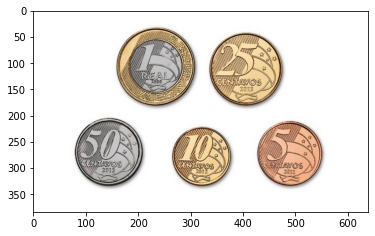

In [25]:
img = cv2.imread('../imgs/moedas.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

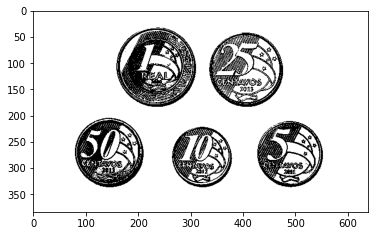

In [26]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret2, th1 = cv2.threshold(gray, 180,200, cv2.THRESH_BINARY)
plt.imshow(th1, cmap='gray')

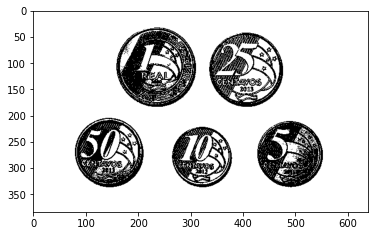

In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret2, th1 = cv2.threshold(gray, 0, 200, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th1, cmap='gray')

In [28]:
ret2

180.0

### Combinando filtros

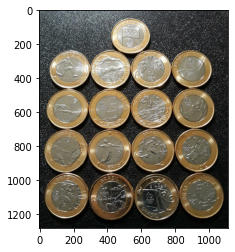

In [29]:
img = cv2.imread('../imgs/moedas_noise.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

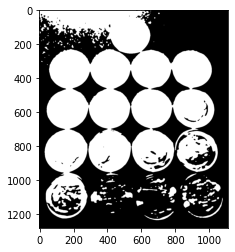

In [30]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.blur(gray, (5,5),0)
blur = cv2.GaussianBlur(gray, (21,21),0)
ret2, th1 = cv2.threshold(blur, 100, 200, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th1, cmap='gray')

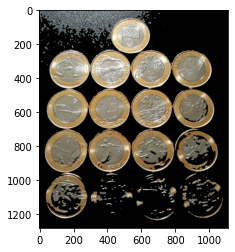

In [31]:
masked = cv2.bitwise_and(img, img, mask=th1)
plt.imshow(masked, cmap='gray')

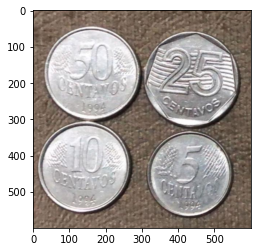

In [32]:
img = cv2.imread('../imgs/moedas_reais.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [33]:
img.shape

(600, 600, 3)

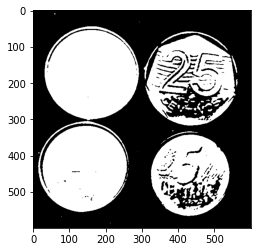

In [34]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
#blur = cv2.blur(gray, (5,5), 0)
ret1, th1 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(th1, cmap='gray')

In [35]:
ret1

148.0

#### Equalização do histograma

* Podemos tornar uma imagem mais uniforme por meio do seu histograma
* Modifica a imagem de acordo com a distribuição do pixel

![https://docs.opencv.org/4.x/histogram_equalization.png](https://docs.opencv.org/4.x/histogram_equalization.png)

https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

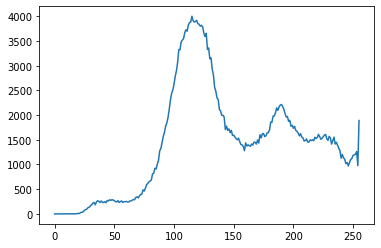

In [36]:
histr = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(histr)
plt.show()

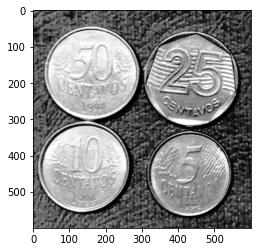

In [37]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_eq = cv2.equalizeHist(img_gray)
plt.imshow(img_eq, cmap='gray')

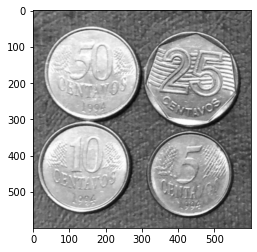

In [38]:
plt.imshow(img_gray, cmap='gray')

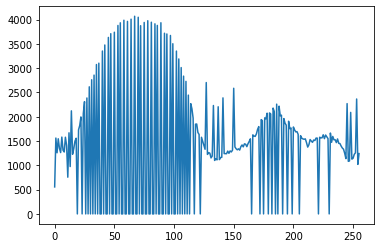

In [39]:
histr = cv2.calcHist([img_eq], [0], None, [256], [0,256])
plt.plot(histr)
plt.show()

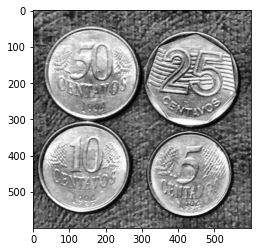

In [40]:
clahe = cv2.createCLAHE(clipLimit= 2, tileGridSize=(5,5))
cl1 = clahe.apply(img_gray)
plt.imshow(cl1, cmap='gray')

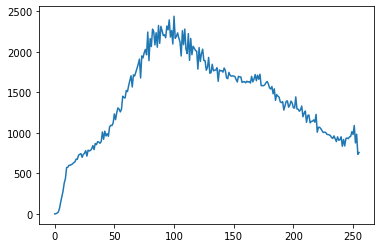

In [41]:
histr = cv2.calcHist([cl1], [0], None, [256], [0,256])
plt.plot(histr)
plt.show()

### Exercícios

* Uma das aplicações de PDI é a extração de texto em imagem por meio do OCR.
* Existem diversas bibliotecas para fazer isso, uma delas é a Tesseract.
* Embora o algoritmo seja eficiente para identificação de caracteres, temos inúmeras falhas dependendo da imagem
  * A presença de ruídos, sombras, falta de alinhamento, background, entre outras coisas pode prejudicar a leitura do OCR
 
Sendo assim, neste exercício, iremos tentar melhorar uma imagem de placa de carro de forma que possamos ler as informações presentes nesta placa
* Quais filtros ou técnicas de préprocessamento foram necessárias para identificação correta?
* Bônus: escolha uma outra imagem de placa de carro e teste seu algoritmo. Os mesmos filtros retornam mesmo resultado para esta imagem? Em caso negativo, o que você acredita que essa imagem tem de diferente que pode estar prejudicando a performance do tesseract? Tente alterar o pré-processamento e veja o desempenho novamente do algoritmo

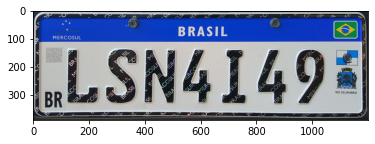

In [42]:
img = cv2.imread('../imgs/placa.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Para instalar o OCR: 

* baixe os binários do tesseract disponíveis aqui https://github.com/tesseract-ocr/tessdoc
* Rode o comando abaixo para instalar o pytesseract

Alguns tutoriais de instalação e uso do tesseract:

https://nanonets.com/blog/ocr-with-tesseract/

https://www.projectpro.io/article/how-to-train-tesseract-ocr-python/561

!pip install pytesseract

In [43]:
import pytesseract

In [44]:
options = "--psm 11"
text = pytesseract.image_to_string(img, config=options)

In [45]:
text

'(ox\n\n7\n\no\n\nCE\n\nKS\n\na\n\ne\n\noe\n\nES\n\nSy\n\n3\n\nRay\n\nNODE; JANEIRO\n\n<2)\n\noS\n\n&\n\nroy\n\nSS\n\nSs\n\nBR\n\nA ES\n\x0c'